In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium as fl
import requests

In [22]:
df1 = pd.read_csv("owid-energy-data.csv")
df1.set_index("country", inplace=True)

Exploring the structure of the dataset 

In [9]:
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
Index: 17239 entries, Afghanistan to Zimbabwe
Columns: 127 entries, iso_code to wind_energy_per_capita
dtypes: float64(125), int64(1), object(1)
memory usage: 16.8+ MB


,iso_code,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exploring the statistics of the dataset

In [7]:
df1.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,17239.000000,7152.000000,13589.000000,5.074000e+03,9491.000000,6474.000000,10106.000000,9983.000000,10135.000000,4936.000000,...,4835.000000,7112.000000,4367.000000,6067.000000,1820.000000,4835.000000,4743.000000,4835.000000,7112.000000,4367.000000
mean,1973.609722,23.968662,9.621462,1.841334e+14,14.152412,20.067887,15.282424,4.224858,42.962626,2.094248,...,7.969383,13.952362,36.392106,1.223524,209.910982,0.371352,3.257272,23.392614,53.206260,149.732919
std,34.727666,725.148859,149.031801,1.311620e+16,92.682368,354.470689,176.113214,26.573195,316.803222,5.604580,...,72.336142,60.524479,150.525206,4.396865,5707.382457,1.421771,21.193715,165.083532,239.279519,559.841069
min,1900.000000,-100.000000,-2366.470000,-1.000000e+02,-1225.490000,-100.000000,-3638.516000,-95.005000,-6910.324000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,-10.409000,0.000000,0.000000,0.000000
25%,1946.000000,-5.226250,0.000000,-1.382250e+00,0.000000,-3.816750,0.000000,-0.670000,-0.065000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.481000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1983.000000,2.030000,0.000000,3.718500e+00,0.000000,1.300000,0.000000,2.341000,0.445000,0.019000,...,0.000000,0.000000,0.000000,0.000000,19.732000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2002.000000,9.994500,0.163000,1.152850e+01,1.333000,10.692750,1.384000,6.713000,8.435000,1.595500,...,0.017000,0.000000,0.432000,0.108500,50.064000,0.022000,0.019000,0.191500,0.555000,5.816500
max,2021.000000,44965.754000,3057.952000,9.342930e+17,2093.606000,25500.000000,2795.152000,1458.505000,6502.243000,72.881000,...,2111.177000,1129.198000,2306.786000,56.840000,242329.182000,24.601000,430.975000,3925.718000,3588.088000,6965.521000


Creating list of the EU countries and the aggregated data for the EU.
The focus is given on renewables electricity in the EU.
The aggregated data of other continents were also stored,
because a continent to continent comparison might provide useful insights.

In [71]:
Eu_countries = ['European Union (27)', 'Africa', 'Australia', 'Asia Pacific', 'United States',
                'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland',
                'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
                'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
eu2 = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland',
                'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
                'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

Choosing the features for the exploratory data analysis
Firstly, electricity generation, changes in energy consumption and renewables electricity over the years are examined.

In [24]:

test = df1.loc[Eu_countries, ['year', 'renewables_electricity', 'electricity_generation', "energy_cons_change_pct",
                              "electricity_demand", "fossil_electricity"]].reset_index().set_index('year').dropna()

A function is to produce the visualizations.

In [25]:
def plot(num, title, xlab, ylab):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.plot(num)

Feature extraction 

In [31]:
elec_over_years = test["renewables_electricity"].loc[(test["country"] == "European Union (27)")]
cons_in_pct = test["energy_cons_change_pct"].loc[(test["country"] == "European Union (27)")]
elec_dem = test["electricity_demand"].loc[(test["country"] == "European Union (27)")]
elec_over_years_gr = test["renewables_electricity"].loc[(test["country"] == "Greece")]


year
1990     1.77
1991     3.10
1992     2.21
1993     2.33
1994     2.64
1995     3.56
1996     4.39
1997     3.92
1998     3.79
1999     4.75
2000     4.14
2001     2.94
2002     3.58
2003     5.89
2004     5.91
2005     6.41
2006     7.67
2007     4.59
2008     5.75
2009     8.16
2010    10.53
2011     8.15
2012    10.13
2013    14.36
2014    12.18
2015    14.85
2016    14.89
2017    13.80
2018    16.14
2019    16.08
2020    17.51
Name: renewables_electricity, dtype: float64


Plots are created

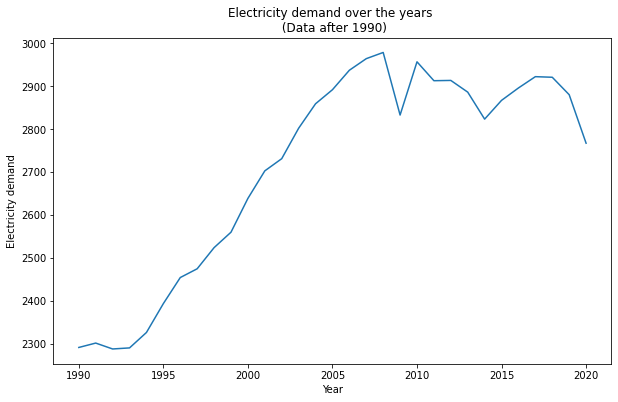

In [14]:
plot(elec_dem, "Electricity demand over the years \n (Data after 1990)", "Year", "Electricity demand")

It is evident that electricity demand is growing from year to year. 
Earth's population increases exponentially reflecting the changes in electricity demand.
The wide spread of electronics (Smartphones, IoT devices etc.) has also affected the demand for electricity.
It is also observed that during the first years of the pandemic the energy demand was significantly reduced due to public health policies (lockdowns, travelling restrictions etc.).
Since electricity demand is increasing it would be interesting to explore if energy consumption also increases.

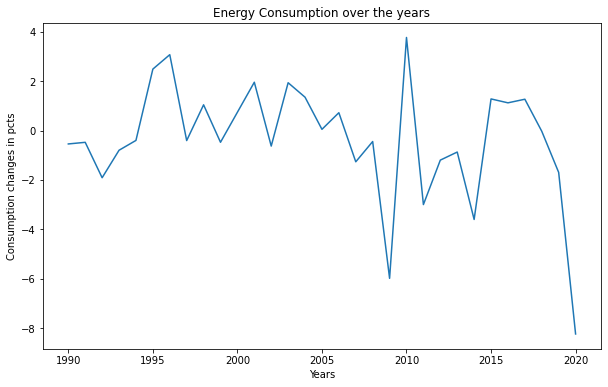

In [17]:
plot(cons_in_pct, "Energy Consumption over the years", "Years", "Consumption changes in pcts")

Altough electricity demand has greatly increased, consumption does not follow the same pattern from year to year.
A lot of energy saving technologies have emerged and it might have helped to save energy.
Similarly to electricity demand, energy consumption was greatly reduced during the pandemic.
Next, electricity from renewables is explored.

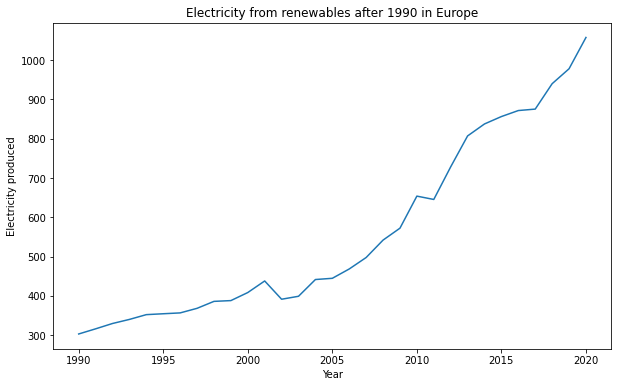

In [18]:
plot(elec_over_years, "Electricity from renewables after 1990 in European Union", "Year", "Electricity produced")

Electricity from renewables has greatly increased over the years. 
Showing more than 300% increase in 30 years.
In order to ensure a sustainable environment, the use of renewable energy resources is inevitable.


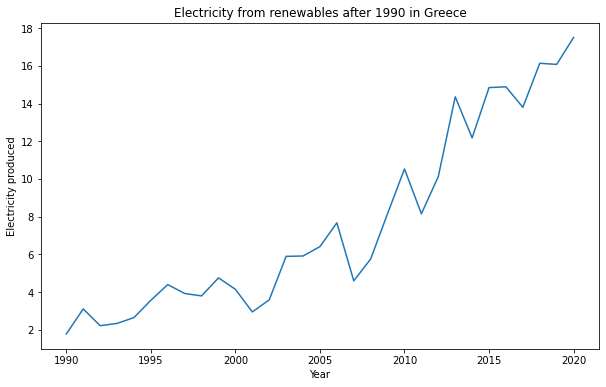

In [21]:
plot(elec_over_years_gr, "Electricity from renewables after 1990 in Greece", "Year", "Electricity produced")

Greece is known for its mediterranean enviroment, meaning that renewable energy resources are plentiful (especially solar and wind electricity).
The electricity production from renewables in Greece is following the pattern of the European Union.
The plot also shows a very high increase over the last 30 years, but there is still a long way to go.

European union has passed a very promising legislation aiming to become the first climate-neutral continent by 2050.
It has also commited to stop the generation of polluting electricity, making progress towards decarbonisation.
Therefore it would be interesting to see how European Union countries are performing in comparison with countries from other continents.
Source: European Commision,Electricity Regulation EU/2019/943

First, the required features will be extracted, then the plot will be created.
A list of colors will also be created so they can be used in the plots.

In [33]:
colors2 = ["purple", "teal", "yellow", "lightcoral"]
Colors = ["Blue","orange", "Green", "Red", 'lightskyblue']
new_colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

<BarContainer object of 4 artists>

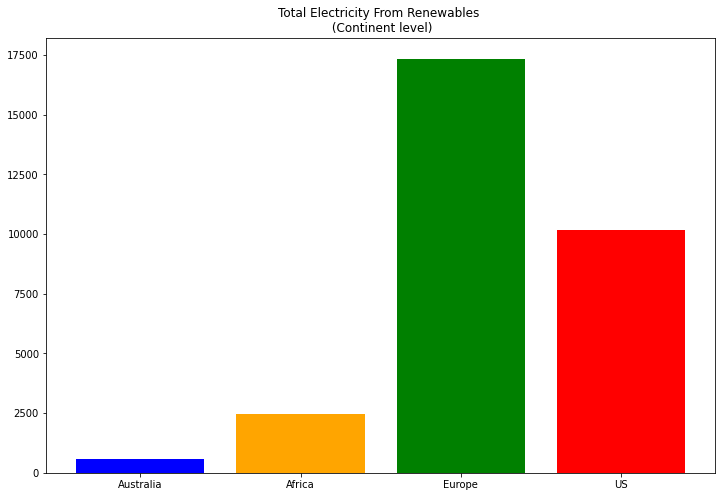

In [34]:
renewables_electricity_EU = test["renewables_electricity"].loc[(test["country"] == "European Union (27)")].sum()
renewables_electricity_US = test["renewables_electricity"].loc[(test["country"] == "United States")].sum()
renewables_electricity_AF = test["renewables_electricity"].loc[(test["country"] == "Africa")].sum()
renewables_electricity_AU = test["renewables_electricity"].loc[(test["country"] == "Australia")].sum()
total_elec_from_renew = {"Australia": renewables_electricity_AU, "Africa": renewables_electricity_AF,
                         "Europe": renewables_electricity_EU, "US": renewables_electricity_US}

countries = list(total_elec_from_renew.keys())
values = list(total_elec_from_renew.values())
plt.rcParams["figure.figsize"] = (12, 8)
plt.title("Total Electricity From Renewables \n (Continent level)")
plt.bar(countries, values, color=Colors)

European Union is by far the biggest producer in renewables electricity among other continents.
EU is highly commited to achieve pollution reduction and climate sustainability.
Next the average shares of different electricity sources in European Union are explored.

(-1.126609509008781,
 1.1012671194766086,
 -1.1017853375474904,
 1.1266341860597753)

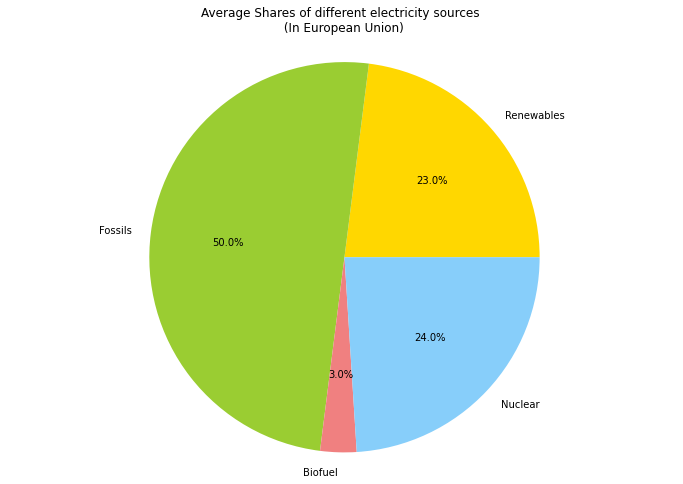

In [35]:
test2 = df1.loc[Eu_countries, ['year', "renewables_share_elec", "fossil_share_elec", "biofuel_share_elec",
                               "nuclear_share_elec"]].reset_index().set_index('year').dropna() #slicing the df we want to explore
test2["Avg_renew_share"] = test2.groupby('country')["renewables_share_elec"].transform(lambda x: x.mean()) #computing the features
test2["Avg_fossil_share"] = test2.groupby('country')["fossil_share_elec"].transform(lambda x: x.mean())
test2["Avg_biofuel_share"] = test2.groupby('country')["biofuel_share_elec"].transform(lambda x: x.mean())
test2["Avg_nuclear_share"] = test2.groupby('country')["nuclear_share_elec"].transform(lambda x: x.mean())
labels = ["Renewables", "Fossils", "Biofuel", "Nuclear"]
shares = [23, 50, 3, 24] #rounding up the numbers
fig = plt.subplots(figsize=(12,8))
plt.pie(shares, labels=labels, colors=new_colors, autopct='%1.1f%%')
plt.title("Average Shares of different electricity sources \n (In European Union)")
plt.axis("equal")

Altough the renewables electricity has greatly increased, fossil fuels are still widely used for electricity production.
Many countries might not be able to produce electricity from other sources increasing the share of fossil electricity.
Nuclear energy greatly reduces costs and increases electricity production but nuclear wastes are a big issue for the planet.

Top 5 Countries in renewables electricity in EU.
First, total electricity from renewables from 1990 and above is computed, then the plot is generated.

<BarContainer object of 155 artists>

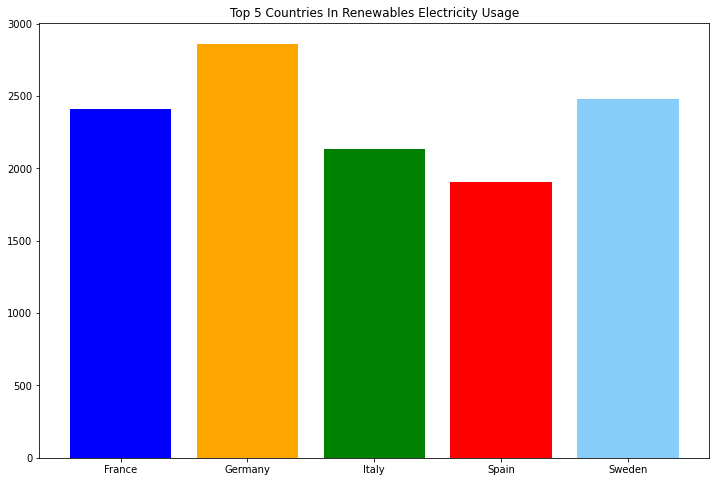

In [34]:
test["total_electricity_from_renews"] = test.groupby("country")["renewables_electricity"].transform(lambda x: x.sum())
# total_electricity_df
te_df = test.loc[
    (test["total_electricity_from_renews"] >= 1800) & (test["total_electricity_from_renews"] <= 4100) &
    (test["country"] != "Africa")]
plt.title("Top 5 Countries In Renewables Electricity Usage")
plt.bar(te_df["country"], te_df["total_electricity_from_renews"], color=Colors)

Then the usage of renewables electricity over the years is explored for the top5 countries.

In [36]:
fr = test["renewables_electricity"].loc[(test["country"] == "France")]
sp = test["renewables_electricity"].loc[(test["country"] == "Spain")]
it = test["renewables_electricity"].loc[(test["country"] == "Italy")]
ger = test["renewables_electricity"].loc[(test["country"] == "Germany")]
swe = test["renewables_electricity"].loc[(test["country"] == "Sweden")]
eu27 = test["renewables_electricity"].loc[(test["country"] == "European Union (27)")]

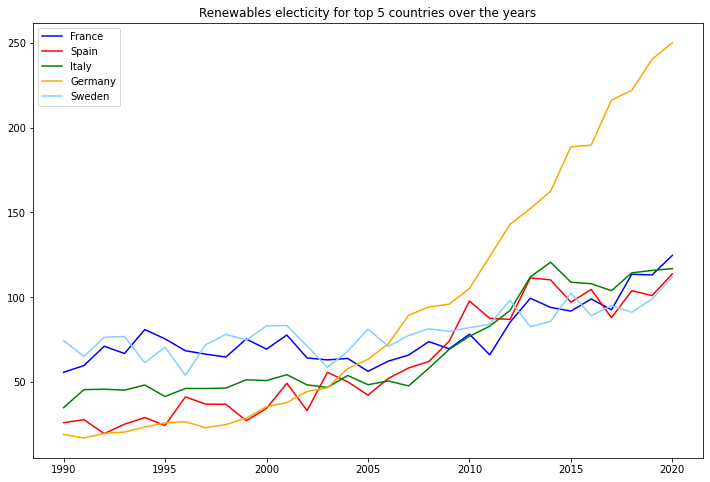

In [38]:
plt.figure(figsize=(12,8))
plt.title("Renewables electicity for top 5 countries over the years")
plt.plot(fr,label="France",color="blue")
plt.plot(sp,label="Spain",color="red")
plt.plot(it,label="Italy",color="Green")
plt.plot(ger,label="Germany", color="orange")
plt.plot(swe,label="Sweden", color="lightskyblue")
plt.legend()

Germany is the top country in electricity usage outperforming the rest of top5.
The rest of the countries are showing a similar approach to renewables electricity usage by steadily increasing their renewables electricity generation.
Then we will compare the histograms of renewable electricity for the top5 countries and EU over the years.


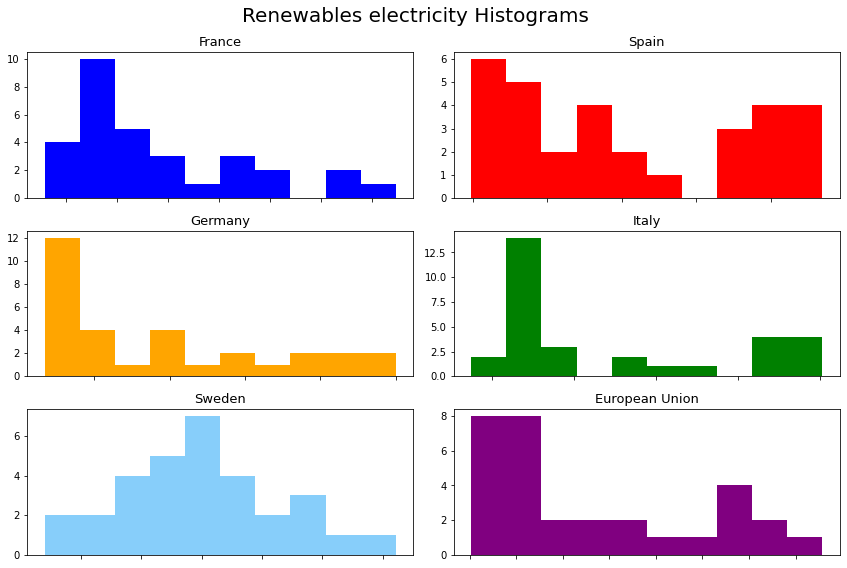

In [51]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig.suptitle('Renewables electricity Histograms ', fontsize=20)
ax[0, 0].hist(fr, color="Blue")
ax[0, 0].set_title("France", fontsize=13)
ax[0, 1].hist(sp, color="Red")
ax[0, 1].set_title("Spain", fontsize=13)
ax[1, 0].hist(ger, color="Orange")
ax[1, 0].set_title("Germany", fontsize=13)
ax[1, 1].hist(it, color="Green")
ax[1, 1].set_title("Italy", fontsize=13)
ax[2, 0].hist(swe, color="lightskyblue")
ax[2, 0].set_title("Sweden", fontsize=13)
ax[2, 1].hist(eu27, color="Purple")
ax[2, 1].set_title("European Union", fontsize=13)
[axi.set_xticklabels([]) for axi in ax.ravel()] #removing the x axis 
fig.tight_layout()

All of these countries have some features in common.
They are economies greatly affecting the European economy as a whole.
So it would be very interesting to explore the relationship between different variables and examine how corelllated they are.
Fossil electricity is accountable for 50% of the total european electricity production meaning that fossil fuels production might be 
highly correlated with demographic factors such as gpd and population, ultimately affecting electricity production as a whole.
Gross domestic product (GDP) is the standard measure of the value added created through the production of goods and services in a country during a certain period.

In [73]:
test3 = df1.loc[Eu_countries, ['year', "coal_production", "gas_production", "oil_production", "gdp",
                               "population", "electricity_generation", "renewables_electricity"]
].reset_index().set_index('year').dropna()  #generating the dataframe with the required features.

In [78]:
eu =  test3.loc[(test3["country"] == "European Union (27)")]
eu

,country,coal_production,gas_production,oil_production,gdp,population,electricity_generation,renewables_electricity
year,,,,,,,,


In [40]:
cor = np.array(test3.corr().round(2)) #computing the correlation between the variables of the dataframe

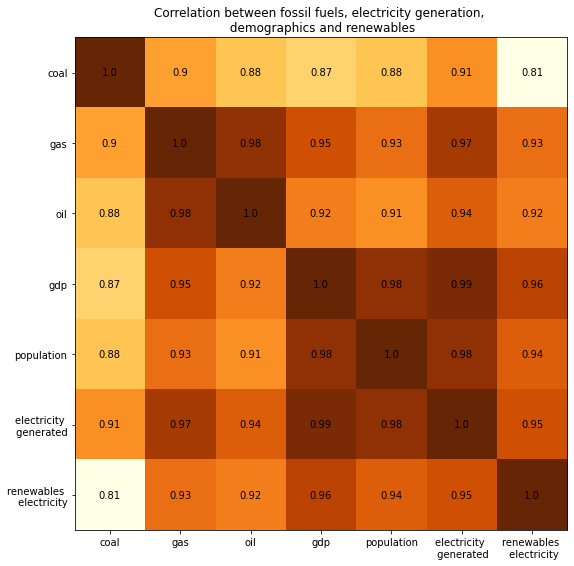

In [62]:
fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(cor, cmap="YlOrBr")
plt.gcf().set_size_inches(8, 8)
label = ["coal", "gas", "oil", "gdp", "population", "electricity \n generated", "renewables \n electricity"]
label2 = ["biofuels", "fossils", "nuclear", "renewables", "other renewables \n (exc biofuel)"]
ax.set_xticks(np.arange(len(label)), labels=label)
ax.set_yticks(np.arange(len(label)), labels=label)
for i in range(len(label)):
    for j in range(len(label)):
        text = ax.text(j, i, cor[i, j],
                       ha="center", va="center", color="k")
ax.set_title("Correlation between fossil fuels, electricity generation, \n demographics and renewables")
fig.tight_layout()

From the correlation heatmap a very positive relationship between fossil fuels, gdp and population is observed.
Meaning that fossil production increases gdp and electricity generation allowing countries to improve their economy
leading to less spending for energy production.
It is also evident that gas and oil production is highly correlated with renewables electricity.
Next the relationship between different kinds of electricity will be explored in order to determine if different kinds of electricity have any relationships.
If fossil electricity is highly correlated with renewables electricity, it might be an indication that countries who are able to produce large amounts of fossil electricity 
can also produce high amounts of renewables electricity.


In [41]:
#producing the dataframe 
test4 = df1.loc[Eu_countries, ['year', "biofuel_electricity", "fossil_electricity",
                               "nuclear_electricity", "renewables_electricity",
                               "other_renewable_exc_biofuel_electricity"]].reset_index().set_index('year').dropna() 

In [42]:
cor2 = np.array(test4.corr().round(2)) #computing the correlation

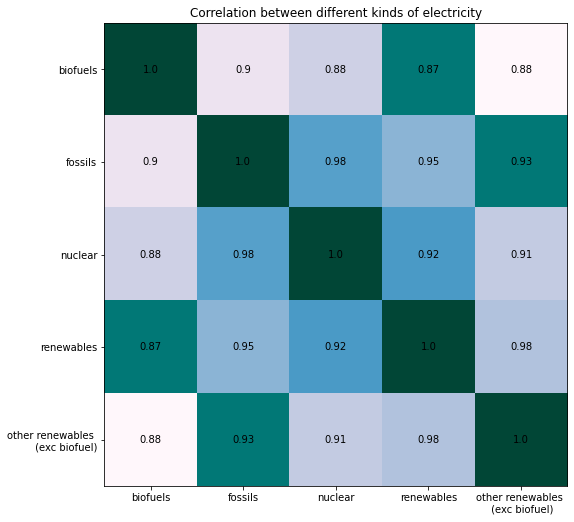

In [59]:
fig, ax = plt.subplots()
im = ax.imshow(cor2, cmap="PuBuGn")
plt.gcf().set_size_inches(8, 8)
ax.set_xticks(np.arange(len(label2)), labels=label2)
ax.set_yticks(np.arange(len(label2)), labels=label2)
for i in range(len(label2)):
    for j in range(len(label2)):
        text = ax.text(j, i, cor[i, j],
                       ha="center", va="center", color="k")
ax.set_title("Correlation between different kinds of electricity")
fig.tight_layout()
plt.show()

Fossil,nuclear and renewables electricity are highly correlated. 
Therefore, it is possible that countries,able to produce fossil and nuclear electricity can also produce great amounts of renewables electricity.
Fossil and nuclear electricity production can lead to economic growth, and might support the fact 
that the economic status of a country plays a major part in renewables electricity usage.
But correlation does not imply causation, so we will also examine the scatter plots of fossil production and renewables electricity,
gdp and renewables electricity, as well as fossil production and gdp of the top5 countries.

In [81]:
test3["fossil_production"] = test3["coal_production"] +test3["gas_production"] + test3["oil_production"]




In [82]:
fr = test3["renewables_electricity"].loc[(test3["country"] == "France")]
sp = test3["renewables_electricity"].loc[(test3["country"] == "Spain")]
it = test3["renewables_electricity"].loc[(test3["country"] == "Italy")]
ger = test3["renewables_electricity"].loc[(test3["country"] == "Germany")]
swe = test3["renewables_electricity"].loc[(test3["country"] == "Sweden")]

fr2 = test3["fossil_production"].loc[(test3["country"] == "France")]
sp2 = test3["fossil_production"].loc[(test3["country"] == "Spain")]
it2 = test3["fossil_production"].loc[(test3["country"] == "Italy")]
ger2 = test3["fossil_production"].loc[(test3["country"] == "Germany")]
swe2 = test3["fossil_production"].loc[(test3["country"] == "Sweden")]


fr3 = test3["gdp"].loc[(test3["country"] == "France")]
sp3 = test3["gdp"].loc[(test3["country"] == "Spain")]
it3 = test3["gdp"].loc[(test3["country"] == "Italy")]
ger3 = test3["gdp"].loc[(test3["country"] == "Germany")]
swe3 = test3["gdp"].loc[(test3["country"] == "Sweden")]



In [74]:
eu =  test3.loc[(test3["country"] == "European Union (27)")]

In [75]:
print(eu)


Empty DataFrame
Columns: [country, coal_production, gas_production, oil_production, gdp, population, electricity_generation, renewables_electricity]
Index: []


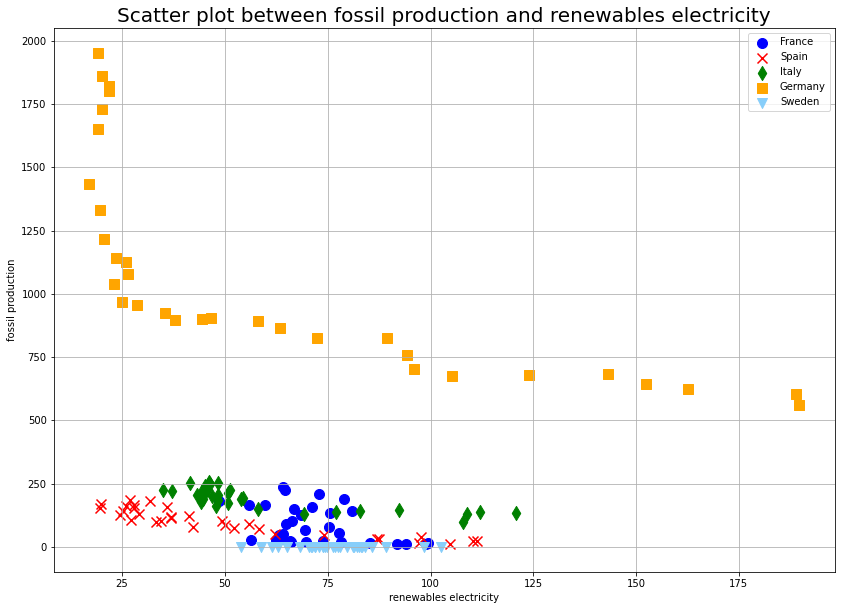

In [83]:
plt.figure(figsize=(14, 10))
plt.scatter(fr, fr2, c="Blue", s=100, marker="o")
plt.scatter(sp, sp2, c="Red", s=100, marker="x")
plt.scatter(it, it2, c="Green", s=100, marker="d")
plt.scatter(ger, ger2, c="Orange", s=100, marker="s")
plt.scatter(swe, swe2, c="lightskyblue", s=100, marker="v")
plt.title("Scatter plot between fossil production and renewables electricity", fontsize=20)
plt.xlabel("renewables electricity")
plt.ylabel("fossil production")
plt.legend(["France", "Spain", "Italy", "Germany", "Sweden"])
plt.grid(which="major", zorder=-1.0)


Fossil production and renewables electricity follow a different direction, after a closer look at the plot.

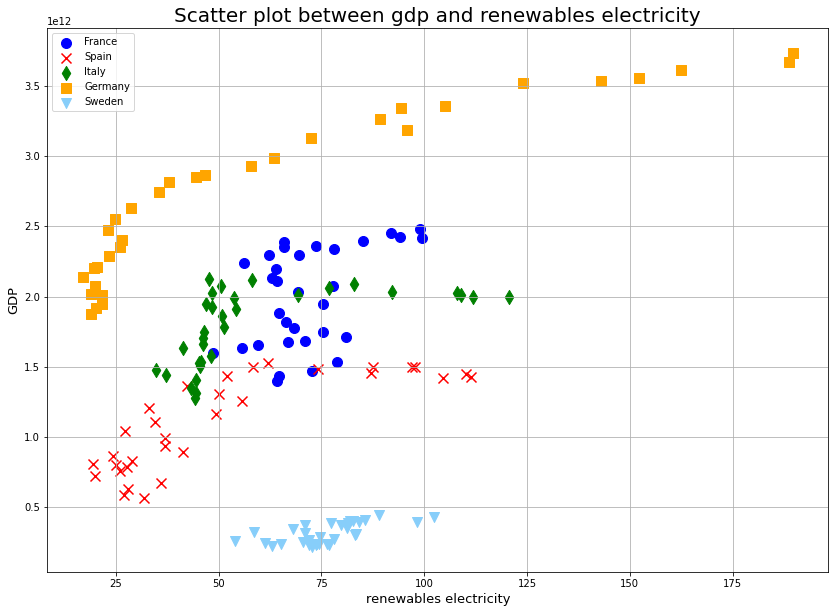

In [85]:
plt.figure(figsize=(14, 10))
plt.scatter(fr, fr3, c="Blue", s=100, marker="o")
plt.scatter(sp, sp3, c="Red", s=100, marker="x")
plt.scatter(it, it3, c="Green", s=100, marker="d")
plt.scatter(ger, ger3, c="Orange", s=100, marker="s")
plt.scatter(swe, swe3, c="lightskyblue", s=100, marker="v")
plt.title("Scatter plot between gdp and renewables electricity", fontsize=20)
plt.xlabel("renewables electricity", fontsize=13)
plt.ylabel("GDP", fontsize=13)
plt.legend(["France", "Spain", "Italy", "Germany", "Sweden"])
plt.grid(which="major", zorder=-1.0)


On the other hand, GDP and renewables electricity show a positive relationship verifying the fact that countries with 
high GDP have more electricity deriving from renewables.

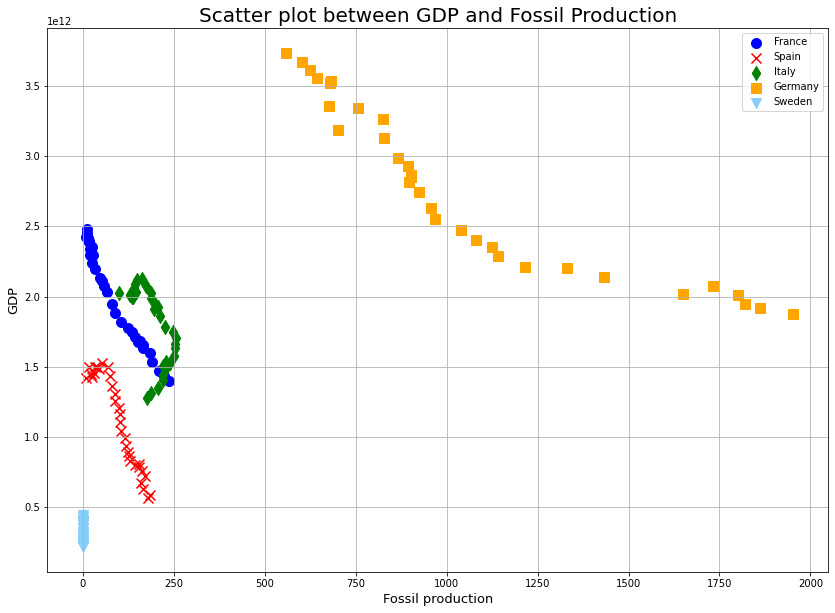

In [86]:
plt.figure(figsize=(14, 10))
plt.scatter(fr2, fr3, c="Blue", s=100, marker="o")
plt.scatter(sp2, sp3, c="Red", s=100, marker="x")
plt.scatter(it2, it3, c="Green", s=100, marker="d")
plt.scatter(ger2, ger3, c="Orange", s=100, marker="s")
plt.scatter(swe2, swe3, c="lightskyblue", s=100, marker="v")
plt.title("Scatter plot between GDP and Fossil Production", fontsize=20)
plt.xlabel("Fossil production", fontsize=13)
plt.ylabel("GDP", fontsize=13)
plt.legend(["France", "Spain", "Italy", "Germany", "Sweden"])
plt.grid(which="major", zorder=-1.0)

Similarly to the first scatter plot GDP and Fossil production show a slightly negative relationship, meaning that
fossil production is not a significant factor for economic growth.

Finally, two chorepleth maps will be created the first will show renewables electricity in European Union,
while the second will show the fossil electricity.

In [106]:
eumap1 = df1.loc[eu2, ["year", "renewables_electricity", "iso_code", "fossil_electricity"]].reset_index().dropna()
eumap2 = eumap1.loc[(eumap1["year"] >= 1990)] #Data after 1990 because there are not null values.
iso_codes = ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK','EST','FIN','FRA','DEU','GRC','HUN','IRL','ITA','LVA','LTU','LUX', 'MLT','NLD','POL','PRT', 'ROU', 'SVK','SVN','ESP', 'SWE']
total_el = eumap2.groupby("country")["renewables_electricity"].transform(lambda x: x.sum()).unique()
total_fol = eumap2.groupby("country")["fossil_electricity"].transform(lambda x: x.sum()).unique()

eumap_final = pd.DataFrame(list(zip(iso_codes, total_el, total_fol)), columns=["country", "renewables_electricity", "fossil_electricity"])


In [107]:
geo_url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
resp = requests.get(geo_url)
geo = resp.json()

In [108]:
mapeu = fl.Map(location=[48, 11], zoom_start=3)

In [109]:
fl.Choropleth(geo_data=geo, data=eumap_final, columns=["country", "renewables_electricity"],
              key_on="feature.id", fill_color="PuOr", fill_opacity=0.7, line_opacity=0.2, legend_name="Renewables electricity (In Terawatt-Hours)").add_to(mapeu)

In [110]:
mapeu

In [113]:
mapeu = fl.Map(location=[48, 11], zoom_start=3)
fl.Choropleth(geo_data=geo, data=eumap_final, columns=["country", "fossil_electricity"],
              key_on="feature.id", fill_color="PuOr", fill_opacity=0.7, line_opacity=0.2, legend_name="Fossil electricity (In Terawatt-Hours)").add_to(mapeu)

In [114]:
mapeu